In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
adv_2000_df = pd.read_csv('data/2000advanced.csv')
adv_2000_df.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP,Player-additional
0,1,Tariq Abdul-Wahad,SG,25,TOT,61,1578,13.6,0.477,0.036,...,0.4,1.8,2.2,0.068,NaN,-1.2,-0.1,-1.2,0.3,abdulta01
1,2,Shareef Abdur-Rahim,SF,23,VAN,82,3223,20.2,0.547,0.075,...,6.2,2.6,8.8,0.132,NaN,2.6,-0.4,2.2,3.4,abdursh01
2,3,Cory Alexander,PG,26,DEN,29,329,8.8,0.381,0.357,...,-0.5,0.4,-0.1,-0.012,NaN,-4.1,1.8,-2.4,0.0,alexaco01
3,4,Ray Allen*,SG,24,MIL,82,3070,20.6,0.570,0.288,...,9.0,1.0,10.1,0.157,NaN,4.7,-1.1,3.6,4.3,allenra02
4,5,Rafer Alston,PG,23,MIL,27,361,4.3,0.310,0.147,...,-0.7,0.0,-0.7,-0.095,NaN,-5.0,-2.3,-7.3,-0.5,alstora01


In [3]:
#drop unnecessary columns
adv_cols = ['Rk', 'Pos', 'Age', 'Tm', 'FTr', 'ORB%', 'DRB%', 'TRB%','AST%', 'STL%', 'BLK%', 'OWS', 'DWS', 'WS', 'WS/48', 'VORP','Player-additional']
adv_2000_df = adv_2000_df.drop(columns=adv_cols, axis=1)

In [4]:
adv_2000_df.columns

Index(['Player', 'G', 'MP', 'PER', 'TS%', '3PAr', 'TOV%', 'USG%',
       'Unnamed: 19', 'Unnamed: 24', 'OBPM', 'DBPM', 'BPM'],
      dtype='object')

In [5]:
#creating dataframe for the rest of 2000 season
per_game_2000_df = pd.read_csv('data/2000pergame.csv')

pg_cols = ['Rk', 'G', 'Tm', 'MP','FG', 'FGA', '2P', '2PA', 'eFG%', 'DRB', 'FT', 'FTA', 'Player-additional']
per_game_2000_df = per_game_2000_df.drop(columns=pg_cols, axis=1)

#combining all into one dataframe
df_2000 = adv_2000_df.merge(per_game_2000_df, on='Player')
df_2000.head()

,Player,G,MP,PER,TS%,3PAr,TOV%,USG%,Unnamed: 19,Unnamed: 24,...,2P%,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Tariq Abdul-Wahad,61,1578,13.6,0.477,0.036,12.7,22.5,NaN,NaN,...,0.435,0.756,1.7,4.8,1.6,1.0,0.5,1.7,2.4,11.4
1,Shareef Abdur-Rahim,82,3223,20.2,0.547,0.075,14.1,25.0,NaN,NaN,...,0.478,0.809,2.7,10.1,3.3,1.1,1.1,3.0,3.0,20.3
2,Cory Alexander,29,329,8.8,0.381,0.357,20.6,18.0,NaN,NaN,...,0.302,0.773,0.3,1.4,2.0,0.8,0.1,1.0,1.3,2.8
3,Ray Allen*,82,3070,20.6,0.570,0.288,10.3,25.6,NaN,NaN,...,0.468,0.887,1.0,4.4,3.8,1.3,0.2,2.2,2.3,22.1
4,Rafer Alston,27,361,4.3,0.310,0.147,23.1,15.5,NaN,NaN,...,0.296,0.750,0.2,0.9,2.6,0.4,0.0,1.1,1.1,2.2


In [6]:
#repeating steps with the 2001 and 2002 seasons
adv_2001_df = pd.read_csv('data/2001advanced.csv').drop(columns=adv_cols, axis=1)
per_game_2001_df = pd.read_csv('data/2001pergame.csv').drop(columns=pg_cols, axis=1)

adv_2002_df = pd.read_csv('data/2002advanced.csv').drop(columns=adv_cols, axis=1)
per_game_2002_df = pd.read_csv('data/2002pergame.csv').drop(columns=pg_cols, axis=1)

#merging dataframes
df_2001 = adv_2001_df.merge(per_game_2001_df, on='Player')
df_2002 = adv_2002_df.merge(per_game_2002_df, on='Player')

#adding dataframes onto one another into one big dataframe for the 3 season stretch
df_2000s = df_2000.append(df_2001, ignore_index=True).append(df_2002, ignore_index=True)
df_2000s.head(10)

,Player,G,MP,PER,TS%,3PAr,TOV%,USG%,Unnamed: 19,Unnamed: 24,...,2P%,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Tariq Abdul-Wahad,61,1578,13.6,0.477,0.036,12.7,22.5,NaN,NaN,...,0.435,0.756,1.7,4.8,1.6,1.0,0.5,1.7,2.4,11.4
1,Shareef Abdur-Rahim,82,3223,20.2,0.547,0.075,14.1,25.0,NaN,NaN,...,0.478,0.809,2.7,10.1,3.3,1.1,1.1,3.0,3.0,20.3
2,Cory Alexander,29,329,8.8,0.381,0.357,20.6,18.0,NaN,NaN,...,0.302,0.773,0.3,1.4,2.0,0.8,0.1,1.0,1.3,2.8
3,Ray Allen*,82,3070,20.6,0.570,0.288,10.3,25.6,NaN,NaN,...,0.468,0.887,1.0,4.4,3.8,1.3,0.2,2.2,2.3,22.1
4,Rafer Alston,27,361,4.3,0.310,0.147,23.1,15.5,NaN,NaN,...,0.296,0.750,0.2,0.9,2.6,0.4,0.0,1.1,1.1,2.2
5,John Amaechi,80,1684,13.2,0.505,0.009,14.4,24.1,NaN,NaN,...,0.439,0.766,0.8,3.3,1.2,0.4,0.5,1.7,2.0,10.5
6,Derek Anderson,64,2201,16.9,0.542,0.207,14.4,23.4,NaN,NaN,...,0.472,0.877,1.3,4.0,3.4,1.4,0.2,2.6,2.3,16.9
7,Kenny Anderson,82,2593,17.4,0.524,0.223,10.6,20.5,NaN,NaN,...,0.456,0.775,0.7,2.7,5.1,1.7,0.1,1.6,2.8,14.0
8,Nick Anderson,72,2094,11.8,0.479,0.508,10.4,18.1,NaN,NaN,...,0.452,0.487,1.2,4.7,1.7,1.3,0.2,1.3,1.6,10.8
9,Shandon Anderson,82,2700,13.8,0.567,0.289,17.9,17.6,NaN,NaN,...,0.523,0.767,1.1,4.7,2.9,1.2,0.4,2.4,2.2,12.3


In [7]:
df_2000s.columns

Index(['Player', 'G', 'MP', 'PER', 'TS%', '3PAr', 'TOV%', 'USG%',
       'Unnamed: 19', 'Unnamed: 24', 'OBPM', 'DBPM', 'BPM', 'Pos', 'Age', 'GS',
       'FG%', '3P', '3PA', '3P%', '2P%', 'FT%', 'ORB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [8]:
#I notice 'Unnamed' columns, so I will drop those
df_2000s.drop(df_2000s.columns[df_2000s.columns.str.contains('Unnamed', case=False)], axis=1, inplace=True)

In [9]:
#Now I'm going to examine this dataframe closer
df_2000s.info()
df_2000s.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  1320 non-null   object 
 1   G       1320 non-null   int64  
 2   MP      1320 non-null   int64  
 3   PER     1320 non-null   float64
 4   TS%     1316 non-null   float64
 5   3PAr    1316 non-null   float64
 6   TOV%    1317 non-null   float64
 7   USG%    1320 non-null   float64
 8   OBPM    1320 non-null   float64
 9   DBPM    1320 non-null   float64
 10  BPM     1320 non-null   float64
 11  Pos     1320 non-null   object 
 12  Age     1320 non-null   int64  
 13  GS      1320 non-null   int64  
 14  FG%     1316 non-null   float64
 15  3P      1320 non-null   float64
 16  3PA     1320 non-null   float64
 17  3P%     1081 non-null   float64
 18  2P%     1315 non-null   float64
 19  FT%     1275 non-null   float64
 20  ORB     1320 non-null   float64
 21  TRB     1320 non-null   float64
 22  

Player      0
G           0
MP          0
PER         0
TS%         4
3PAr        4
TOV%        3
USG%        0
OBPM        0
DBPM        0
BPM         0
Pos         0
Age         0
GS          0
FG%         4
3P          0
3PA         0
3P%       239
2P%         5
FT%        45
ORB         0
TRB         0
AST         0
STL         0
BLK         0
TOV         0
PF          0
PTS         0
dtype: int64

In [10]:
#examining rows with null values. There appears to be a link with the shooting percentages and null values
df_2000s[df_2000s['3P%'].isnull()].head()
#It looks like the Null values are because they didn't attempt a shot. I believe that's the reason for all the other % based stats like FG%, 3P%, 2P%, eFG%, FT% having null values
#I think if I just create a qualifier on MP (minutes played) to remove players this should fix the null values
#I also think I need to create a qualifier anyway so as not to skew the data

,Player,G,MP,PER,TS%,3PAr,TOV%,USG%,OBPM,DBPM,...,2P%,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,PTS
17,Anthony Avent,49,377,5.5,0.368,0.0,17.9,15.8,-6.9,-0.5,...,0.302,0.719,0.5,1.5,0.2,0.3,0.3,0.5,1.3,1.7
28,Benoit Benjamin,3,8,5.5,0.333,0.0,0.0,16.3,-6.0,-0.3,...,0.333,NaN,0.0,0.3,0.0,0.0,0.3,0.0,0.3,0.7
30,Mario Bennett,1,3,-25.5,0.000,0.0,0.0,44.4,-25.2,-19.1,...,0.000,NaN,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
37,Etdrick Bohannon,13,118,10.5,0.615,0.0,29.8,12.7,-4.7,-0.9,...,0.538,0.625,1.0,2.4,0.4,0.2,0.5,0.8,1.9,2.2
38,Calvin Booth,11,143,11.9,0.403,0.0,10.3,18.0,-3.9,0.1,...,0.348,0.714,1.4,2.9,0.6,0.3,1.3,0.5,2.1,3.8


In [11]:
#It looks like there are some player's data that is not necessary and will skew the dataset but there are also some player's data that may be valuable
#I'm going to look closer into this set to see how to best clean the data
df_2000s[df_2000s['3P%'].isnull()].describe()

,G,MP,PER,TS%,3PAr,TOV%,USG%,OBPM,DBPM,BPM,...,2P%,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,PTS
count,239.000000,239.000000,239.000000,235.000000,235.0,236.000000,239.000000,239.000000,239.000000,239.000000,...,235.000000,213.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000
mean,36.648536,625.267782,10.283264,0.477013,0.0,16.997881,15.971130,-3.926360,-0.219665,-4.152720,...,0.439383,0.621995,1.157741,3.311297,0.510879,0.305439,0.558159,0.731799,1.735983,3.818828
std,26.833323,739.649823,6.879183,0.140674,0.0,9.519143,5.513822,4.025206,2.385106,5.556295,...,0.140617,0.184083,0.902571,2.731684,0.510527,0.279427,0.634252,0.562775,0.921067,3.378457
min,1.000000,1.000000,-25.500000,0.000000,0.0,0.000000,0.000000,-25.200000,-19.100000,-44.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.500000,75.000000,7.500000,0.421500,0.0,12.400000,12.650000,-5.600000,-1.000000,-6.150000,...,0.386000,0.510000,0.500000,1.500000,0.200000,0.100000,0.100000,0.350000,1.000000,1.500000
50%,32.000000,281.000000,10.800000,0.499000,0.0,16.150000,15.700000,-3.600000,0.100000,-3.800000,...,0.455000,0.651000,1.000000,2.600000,0.300000,0.200000,0.300000,0.600000,1.700000,2.800000
75%,61.000000,940.000000,13.900000,0.547000,0.0,20.300000,18.400000,-1.600000,0.800000,-1.750000,...,0.504000,0.742000,1.600000,4.250000,0.700000,0.400000,0.750000,1.000000,2.400000,5.050000
max,82.000000,3254.000000,35.800000,1.000000,0.0,100.000000,44.400000,10.700000,10.100000,15.300000,...,1.000000,1.000000,5.000000,16.300000,3.500000,2.000000,3.700000,3.500000,3.800000,20.800000


In [12]:
#The null values in the '3P%' feature are a result of a player not attempting a single 3 pointer in any of these 3 seasons.
#Before dealing with those null values, I'm going to filter the group by adding a minimum for minutes played (MP) in a season.
df_2000s = df_2000s.loc[df_2000s['MP'] > 300]
print(df_2000s.isna().sum())
df_2000s.describe()

Player      0
G           0
MP          0
PER         0
TS%         0
3PAr        0
TOV%        0
USG%        0
OBPM        0
DBPM        0
BPM         0
Pos         0
Age         0
GS          0
FG%         0
3P          0
3PA         0
3P%       117
2P%         0
FT%         0
ORB         0
TRB         0
AST         0
STL         0
BLK         0
TOV         0
PF          0
PTS         0
dtype: int64


,G,MP,PER,TS%,3PAr,TOV%,USG%,OBPM,DBPM,BPM,...,2P%,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,PTS
count,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,...,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000
mean,64.980898,1615.312321,13.774785,0.510499,0.165859,14.138491,18.857307,-0.770774,-0.073543,-0.847087,...,0.456111,0.738004,1.201051,4.182330,2.150143,0.772302,0.505635,1.411461,2.210793,9.337249
std,16.743470,841.874423,4.031942,0.047633,0.172266,3.834482,4.749872,2.475468,1.116167,2.803182,...,0.049698,0.108298,0.850547,2.467363,1.878147,0.450193,0.565260,0.761842,0.732989,5.752975
min,11.000000,301.000000,0.200000,0.310000,0.000000,3.700000,6.400000,-8.800000,-3.200000,-9.300000,...,0.276000,0.258000,0.000000,0.500000,0.100000,0.100000,0.000000,0.200000,0.500000,0.800000
25%,55.000000,865.500000,11.200000,0.480000,0.009000,11.400000,15.600000,-2.500000,-0.900000,-2.800000,...,0.426000,0.684000,0.500000,2.300000,0.800000,0.400000,0.100000,0.800000,1.700000,5.000000
50%,70.000000,1582.000000,13.500000,0.513000,0.112000,13.600000,18.500000,-1.000000,-0.100000,-0.900000,...,0.457000,0.752000,1.000000,3.700000,1.500000,0.700000,0.300000,1.300000,2.200000,7.700000
75%,79.000000,2288.500000,16.100000,0.542000,0.288500,16.300000,21.900000,0.800000,0.700000,0.800000,...,0.488000,0.811500,1.700000,5.400000,2.900000,1.000000,0.600000,1.900000,2.700000,12.200000
max,85.000000,3464.000000,30.600000,0.674000,0.813000,33.800000,37.800000,7.600000,3.600000,9.300000,...,0.688000,1.000000,5.000000,14.300000,10.900000,2.800000,3.700000,4.100000,4.500000,31.400000


In [13]:
#That cleaned up quite a bit. Let me examine the leftover null values in shooting percentage
print(df_2000s[df_2000s['3P%'].isnull()].head())
#This may be helpful for showing an overall trend in playstyle
print(df_2000s[df_2000s['3P%'].isnull()].Pos.value_counts())

            Player   G    MP   PER    TS%  3PAr  TOV%  USG%  OBPM  DBPM  ...  \
17   Anthony Avent  49   377   5.5  0.368   0.0  17.9  15.8  -6.9  -0.5  ...   
56     Mark Bryant  75  1712   8.9  0.547   0.0  18.3  12.0  -3.4  -0.2  ...   
89  Terry Cummings  22   398  14.0  0.474   0.0  12.2  23.4  -2.3  -1.1  ...   
94   Erick Dampier  21   495   9.6  0.427   0.0  12.9  19.1  -4.7  -1.9  ...   
97   Antonio Davis  79  2479  15.1  0.520   0.0  12.1  17.8  -1.0  -1.0  ...   

      2P%    FT%  ORB  TRB  AST  STL  BLK  TOV   PF   PTS  
17  0.302  0.719  0.5  1.5  0.2  0.3  0.3  0.5  1.3   1.7  
56  0.503  0.809  1.7  4.7  0.8  0.4  0.4  1.2  3.3   5.7  
89  0.429  0.821  2.0  4.9  1.0  0.6  0.4  1.2  3.4   8.4  
94  0.405  0.529  2.3  6.4  0.9  0.4  0.7  1.4  3.6   8.0  
97  0.440  0.765  3.0  8.8  1.3  0.5  1.3  1.5  3.4  11.5  

[5 rows x 28 columns]
C     75
PF    37
SF     5
Name: Pos, dtype: int64


In [14]:
#It appears that nearly every single guard (PG/SG) in our dataset has at least attempted one 3 pointer. The only players that haven't have mostly been Cs and some PFs
#Given this information, I think that it's best to drop the '3P%' column and just use 3PA as the 0 attempts may prove to be valuable for my model
df_2000s = df_2000s.drop(columns=['3P%'], axis=1)

In [15]:
df_2000s['Pos'].value_counts()

PG       223
PF       216
SF       214
C        201
SG       184
PG-SG      3
SF-SG      2
SF-PF      1
PF-SF      1
C-PF       1
SG-PG      1
Name: Pos, dtype: int64

In [16]:
#Some players are listed as having two positions. For simplicity, I will convert them to one singular and primary position. That will be the first position before the '-'
position = ['PG-SG', 'SF-SG', 'SF-PF', 'PF-SF', 'C-PF', 'SG-PG']
prim_pos = ['PG', 'SF', 'SF', 'PF', 'C', 'SG']

df_2000s['Pos'] = df_2000s['Pos'].replace(position, prim_pos)

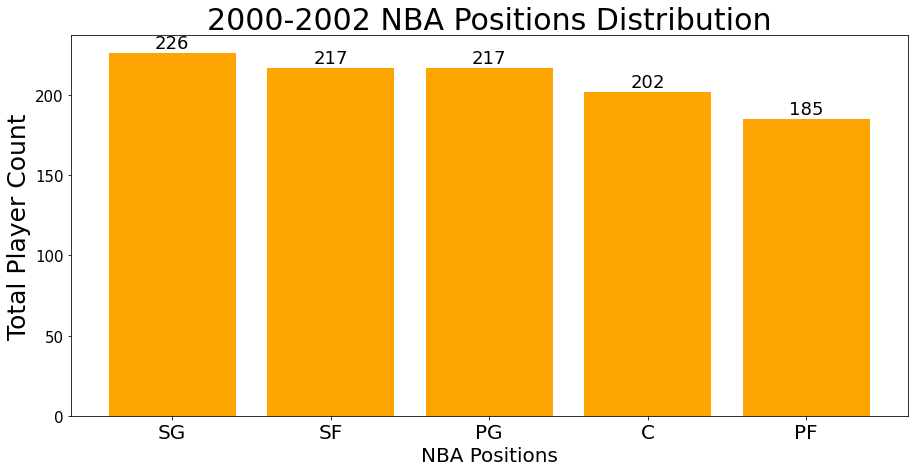

In [17]:
#Checking frequency of target variable (Position)
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (15,7))

ax.bar(
    df_2000s['Pos'].unique(),
    df_2000s['Pos'].value_counts(),
    color = 'Orange'
)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=15)
ax.set_ylabel('Total Player Count', fontsize=25)
ax.set_xlabel('NBA Positions', fontsize=20)
ax.set_title('2000-2002 NBA Positions Distribution', fontsize=30)
    
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(
        label, (x_value, y_value), xytext=(0, space), textcoords="offset points", 
        ha='center', va='bottom', fontsize=18, color='k'
    )
plt.show()

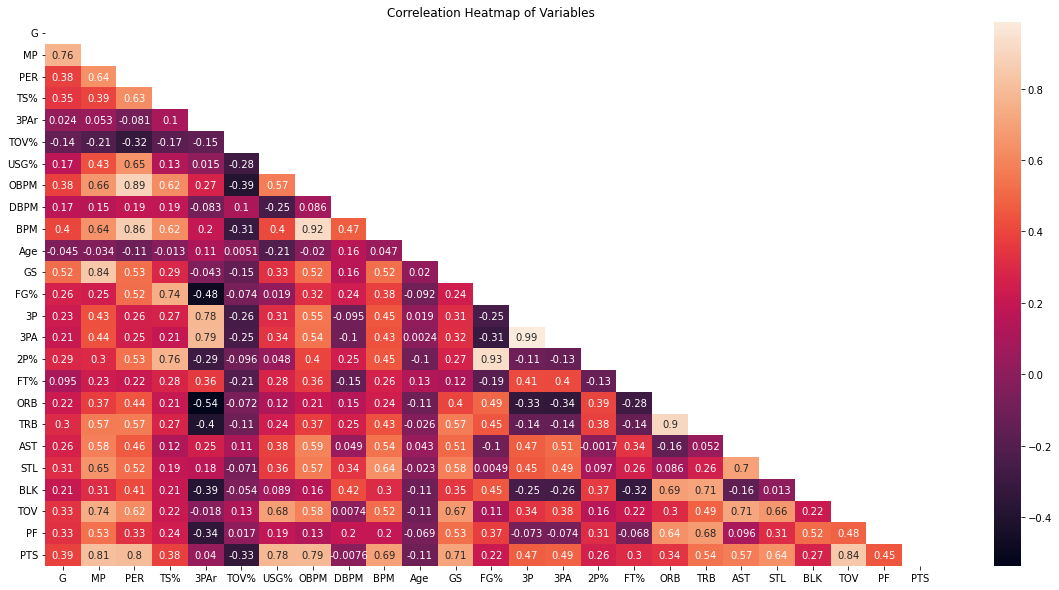

In [18]:
import seaborn as sns

#making price the target variable
X = df_2000s.drop('Pos', axis=1)
y = df_2000s['Pos']

#heatmap to show multicollinearity
heatmap_df = pd.concat([y, X], axis=1)
corr = heatmap_df.corr()

#importing libraries
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize = (20,10))

sns.heatmap(
    data = corr,
    mask = np.triu(np.ones_like(corr, dtype=bool)),
    ax=ax,
    annot=True
)

ax.set_title('Correleation Heatmap of Variables');

In [19]:
#I'm seeing a lot of overlap still, so I will be dropping some of the highly correlated features.
#For example, the 3pt shooting statistics can all be kept under 3 point attempts(3PA) as well as some created advanced stats like Player Effiency Rating (PER) and OBPM (Offensive Box Plus Minus)
#Also, after filtering, the games played(G and GS) played aren't as important for the model I want to build.
irr_cols = ['G', 'PER', 'FG%', '3P', 'GS', 'ORB', 'OBPM', 'Age', 'TS%']
df_2000s = df_2000s.drop(columns=irr_cols, axis=1)

In [20]:
#examining if there are any initial trends among the stats
df_2000s.groupby('Pos').mean()

,MP,3PAr,TOV%,USG%,DBPM,BPM,3PA,2P%,FT%,TRB,AST,STL,BLK,TOV,PF,PTS
Pos,,,,,,,,,,,,,,,,
C,1447.074257,0.013916,14.873762,17.214356,0.248515,-1.788614,0.108416,0.474153,0.655495,5.675743,0.849010,0.494554,1.082178,1.190099,2.615347,7.547030
PF,1632.880184,0.085553,14.104147,18.512442,-0.045161,-1.095853,0.684793,0.463438,0.711590,5.694470,1.420276,0.666820,0.680184,1.390323,2.481106,9.200922
PG,1560.398230,0.265659,16.153097,18.903982,-0.319027,-0.613274,1.985398,0.434018,0.780363,2.340265,4.077876,0.924779,0.119912,1.578319,1.767699,8.598673
SF,1670.447005,0.193770,12.808295,19.744240,-0.164977,-0.621198,1.669585,0.459000,0.753350,4.086636,1.862212,0.811060,0.399539,1.433180,2.201382,10.378802
SG,1780.816216,0.271303,12.475135,19.958378,-0.051351,-0.077838,2.445946,0.451416,0.789330,3.140541,2.409730,0.967568,0.267027,1.448649,2.004324,11.132432


In [23]:
#export the dataframe for easier use in my other notebook
df_2000s.to_csv('data/dataframe_2000s.csv', index=False)